# Statistics: The Science of Decisions Project by Gangadhara Naga Sai

Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.



In [1]:
#Loading data
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

data = pd.read_csv("stroopdata.csv")
data
#The difference is calculated in the csv file itself

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


Questions For Investigation


## 1. What is our independent variable? What is our dependent variable?

>Independent variable: the words list type (congruent words or incongruent words) 

>Dependent variable: the time taken to recognize the colors of ink in equally-number of word lists 




## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

From the fact that our brain processes text faster than colour,when we do the congruent word test we are having dual information from both text and color but for incongruent words test those both dont match and cause a confusion in recognising the color.

>The $H_{O}$(null hypothesis) is mean time taken to recognize the colors of ink for congruent words is equal to or greater than the mean time for incongruent words, so one-tailed t test is to be conducted. The $H_{A}$ (alternative hypothesis) is the congruent words mean is less than the incongruent words mean. 

$$ H_{O} = \mu_{C} \geq \mu_{I} $$

$$ H_{A} = \mu_{C} <  \mu_{I} $$

>#### $ \mu_{C}$ is the mean of the time taken to recognize the color under the congruent condition

>#### $\mu_{I}$is the mean ofthe time taken to recognize the color  under the incongruent condition

### Dependent-samples one-tailed t-test is to be performed:


> We perform this test to find weather the time taken to recognize the congruent words is statistically less than the time taken to recognize the incongruent words for the total population.
>This test we are trying to assess whether the sample means are different because the two populations and population means are different or just by chance.


>T test because we are not having data of total populations mean or variance. And the size is less than 30 ,where cannot be approximated to normal distribution, so we cannot use z test.
- The above data is a sample from a population
- From the data it is clear that the same group has undergone through two treatments of congruent and incongruent tests,which are dependent samples

>One-sided  t test, because to recognize the colour of incogruent words seems difficult, form the fact that processing speed of text is much faster than color, i wanted to examine whether the time was significantly longer for incongruent test compared to congruent test. 



## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.



In [2]:
df=pd.DataFrame({"Mean":data.mean(),"Median":data.median(),"Variance":data.var(),"Standard deviation":data.std()})

df


,Mean,Median,Standard deviation,Variance
Congruent,14.051125,14.3565,3.559358,12.669029
Incongruent,22.015917,21.0175,4.797057,23.011757
Difference,-7.964792,-7.6665,4.864827,23.666541


> #### From the above table we can see :
- Central tendency of differences in groups -7.9648,
- Variability of groups 

>>Congruent groups
>> - Variance is 12.67
>> - Standard deviation is 3.55

>> Incongruent groups 
>> - Variance is 23.012
>> - Standard deviation is 4.8

>> Difference
>> - Variance is 23.67
>> - Standard deviation is 4.86





## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.



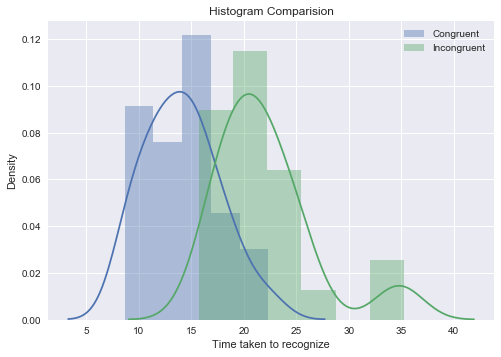

In [3]:
# We are comparing both incongruent and congruent data 
#Distplot divides the data into several bins and the occurance is shown as density of that value in that bin
import seaborn as sns
for a  in ["Congruent","Incongruent"]:
    sns.distplot(data[a], label=a)
plt.ylabel("Density")
plt.title('Histogram Comparision')  
plt.xlabel("Time taken to recognize")
plt.legend();

### From the above plot :
>- The congruent group appears normally distributed,
- The incongruent group appears to be bimodal, with 2 normal distributions.(this might be clear if we observe the total population)
- comparing both,incongruent distribution is having higher values as expected

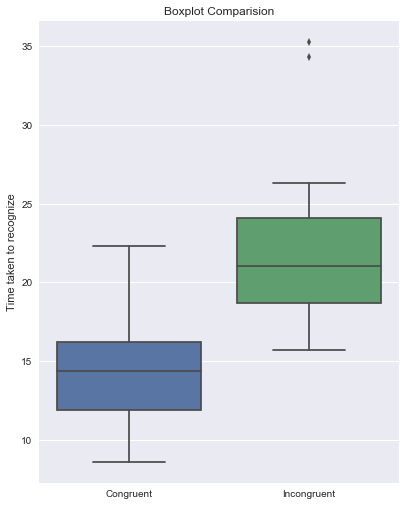

In [11]:
sns.factorplot( data=data[["Congruent","Incongruent"]], kind="box", size=7, aspect=.8)\
.set_xticklabels(["Congruent","Incongruent"])
plt.title('Boxplot Comparision')  
plt.ylabel("Time taken to recognize")

### From the above boxplot:
- We can see two outliers for the incongruent test.
- The mean time taken for the incongruent test is higher than the congruent test


So lets conform by contucting the t test

## 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?



>$ \mu_{Congruent} = 14.05113 $

>$ \mu_{Incongruent} = 22.01592$

>$ \mu_{Difference} = - 7.96479 $

>$Standard-Error_{Differences} = SE_{d} =\frac{\sigma}{\sqrt{n}}=\frac{4.864827}{\sqrt{24}}=0.993029$

>$ df = 𝑛 − 1 = 24 − 1 = 23$

>- t-critical value for a one-tailed test with $\alpha = 0.05$ and 𝑑𝑓 = 23 ,t-critical = −1.714(left tail)

>$t=\frac{\mu_{d}}{SEd}=\frac{ -7.96479}{0.993029}=-8.021$

>- The p-value for a t-statistic of -8.021 with df=23 is very small; it is $p < 0.00001$

>### Since -8.0211 < -1.714 , we Reject Null Hypothesis with 95% confidence.
>#### -  Concluding that form the fact that speed of processing of text is much faster than color, proving stroop effect to be true.



## Refrences:
- http://seaborn.pydata.org/tutorial/distributions.html
- https://en.wikipedia.org/wiki/Stroop_effect
- https://gist.github.com/wrobstory/c990c94fc4598a440e7f